In [163]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv("amazon_cells_labelled.txt", delimiter= '\t', header=None)
df.columns = ['message', 'sentiment']

In [203]:
df.head()

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [204]:
#group data by sentiment to show how much is positive and how much is negative
df.groupby('sentiment').agg(['count', 'size', 'nunique']).stack()

message
sentiment                 
0         count        500
          size         500
          nunique      497
1         count        500
          size         500
          nunique      493

In [206]:
#try to play with different keywords to see how many matches I get
#df[df['message'].str.match('Disappoint')]

,message,sentiment


In [198]:
#trying to find more negative keywords to run through the model to help it predict more accuratly
#df[df.sentiment == 0]

In [190]:
#use keywords to build predictive variables
keywords = ['Good', 'Great', 'Poor', 'Not', 'No', 'Best', 'Excellent', 'Disappoint','Waste','Problem']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matchin
    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [191]:
df['allcaps'] = df.message.str.isupper()

In [192]:
df['message'] = (df['message'] == 'message')

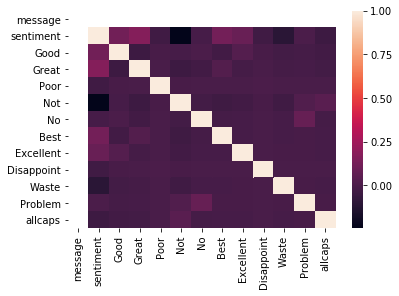

In [193]:
#use heatmap to see how much correlation between variables
sns.heatmap(df.corr())

In [194]:
data = df[keywords + ['allcaps']]
target = df['sentiment']

In [195]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))
    
#calculate the accuracy
print("Percentage accuracy {}".format((data.shape[0] - (target != y_pred).sum()) / data.shape[0]))



Number of mislabeled points out of a total 1000 points : 410
Percentage accuracy 0.59


In [196]:
#use built in confusion matrix to see how well the model work at predicting the variables
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[114, 386],
       [ 24, 476]])

In [197]:
#trying to build my confussion matrix 
y_actu = pd.Series(df['message'], name='Actual')
y_pred = pd.Series(df['sentiment'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1
Actual,,
False,500,500


In [ ]:
#need to determine a count of the number of positive statements vs negative statements to see how balance
#the data set was

In [154]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6
Testing on Sample: 0.574


In [155]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.57, 0.6 , 0.58, 0.58, 0.58, 0.51, 0.61, 0.57, 0.58, 0.55])

In [ ]:
#Do any of your classifiers seem to overfit?

#No, my results are pretty consistent with the scores of my cross validation and hold out groups

In [ ]:
#Which seem to perform the best? Why?

#it appears that I have one cross validation that performed at 0.61 which is the highest of all groups. 
#I think it maybe due to the sample having more positive samples than negative. Based on my confusion
#matrix my dataset is able to predict more positive statements correctly than negative ones.

In [ ]:
#Which features seemed to be most impactful to performance?
#identifying more negative words to add to my model would help my performance.